###### Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
Crime_data= pd.read_csv(r'C:\Users\Linta Stephen\Downloads\ExcelR\Assignments\7.Clustering\crime_data.csv')
Crime_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
Crime_data.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

###### Data Description:
+ Murder:Muder rates in different places of United States
+ Assualt:Assualt rate in different places of United States
+ UrbanPop:urban population in different places of United States
+ Rape:Rape rate in different places of United States

In [5]:
Crime_data.rename({'Unnamed: 0':'States'},axis=1,inplace=True)
Crime_data.head(2)

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5


In [6]:
Crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [7]:
Crime_data.isnull().sum()

States      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [8]:
Crime_data.duplicated().sum()

0

In [9]:
Crime_data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


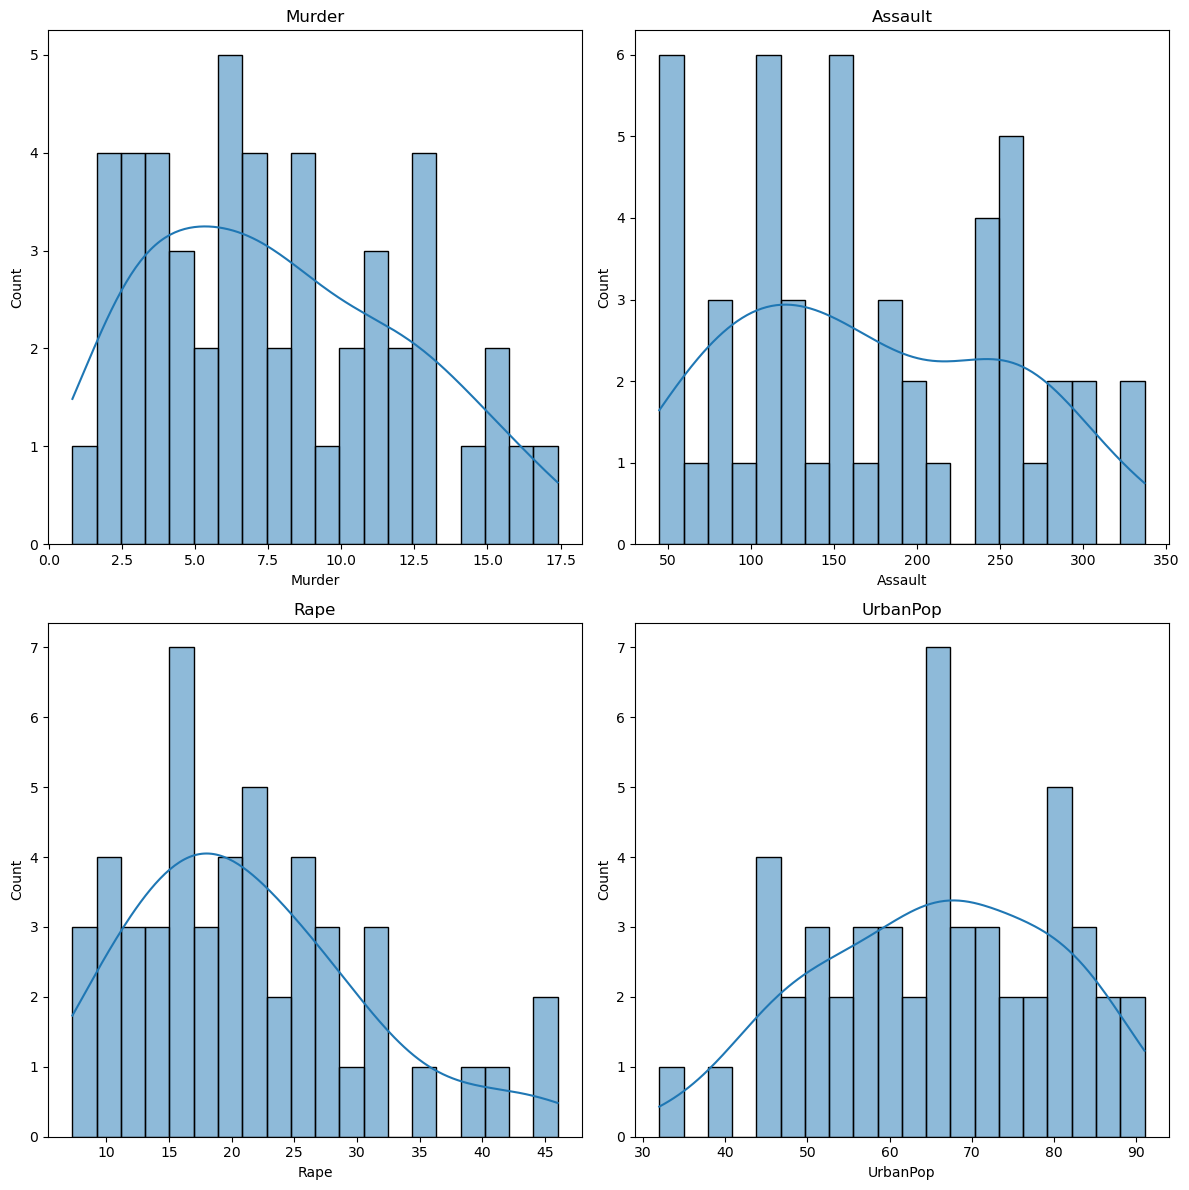

In [10]:
# Explore the distribution of numerical features
num_features=['Murder','Assault','Rape','UrbanPop']

plt.figure(figsize=(12, 12))
for i,feature in enumerate(num_features,1):
    plt.subplot(2,2,i)
    sns.histplot(Crime_data[feature],bins=20,kde=True)              
    plt.title(feature)
plt.tight_layout()
plt.show()

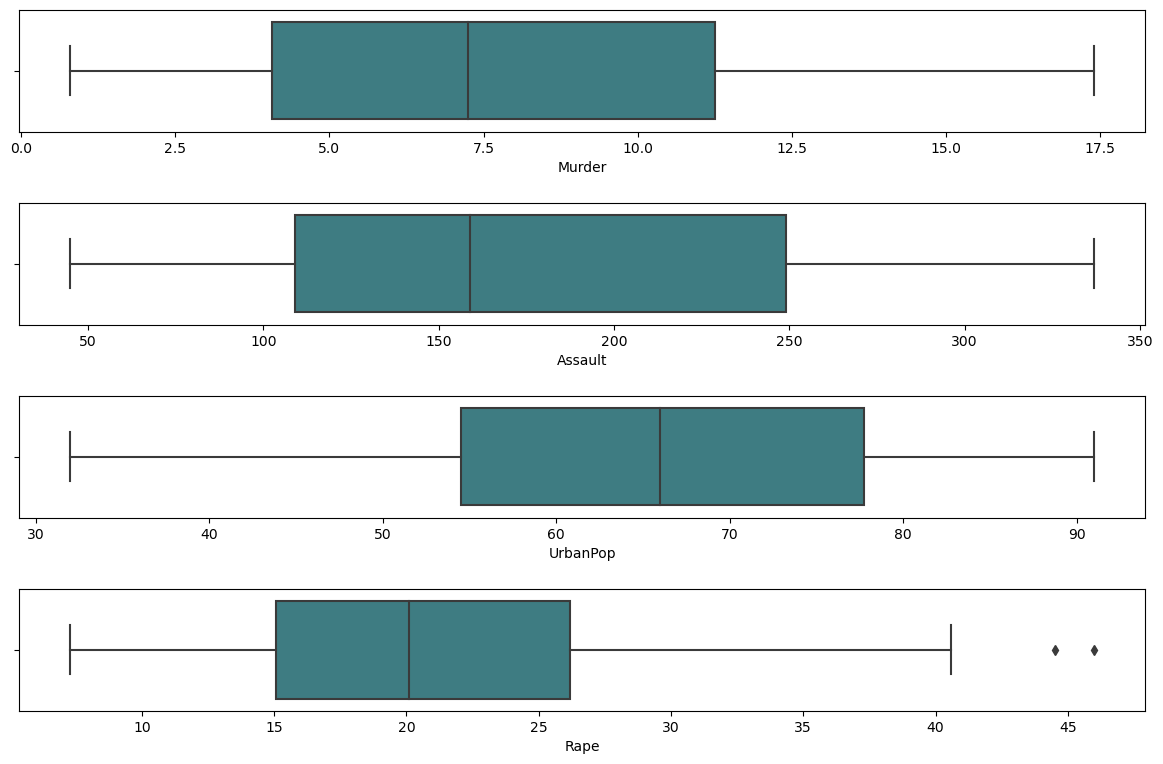

In [11]:
#outlier visualization
fig,axes=plt.subplots(4,1,figsize=(12,8),sharex=False,sharey=False)
sns.boxplot(x='Murder',data=Crime_data,palette='crest',ax=axes[0])
sns.boxplot(x='Assault',data=Crime_data,palette='crest',ax=axes[1])
sns.boxplot(x='UrbanPop',data=Crime_data,palette='crest',ax=axes[2])
sns.boxplot(x='Rape',data=Crime_data,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

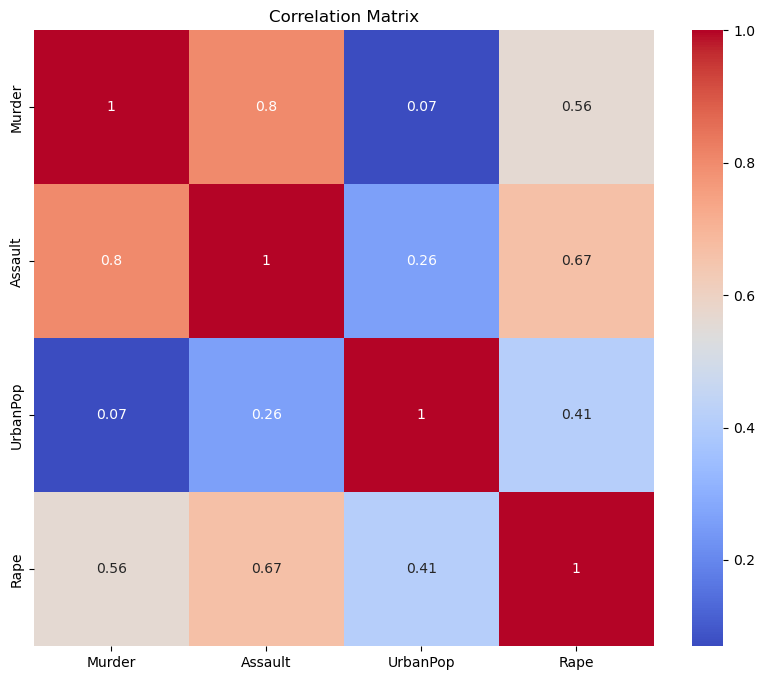

In [12]:
# Explore the correlation between numerical features
plt.figure(figsize=(10,8))
sns.heatmap(Crime_data.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

+ Assault is positively correlated with Murder
+ Assualt is positively correlated with Rape
+ Rape is positively correlated with Murder

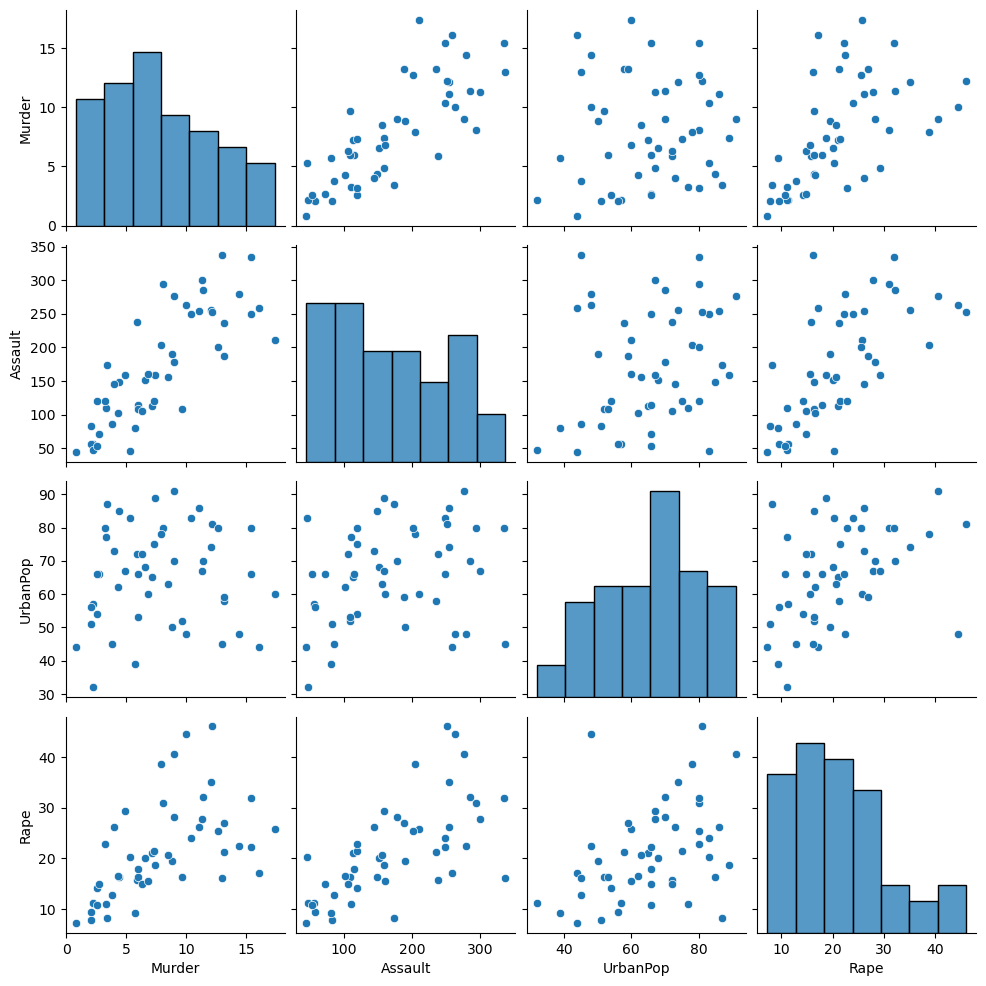

In [13]:
# Create the pair plot
sns.pairplot(Crime_data)
plt.show()

###### Visualization

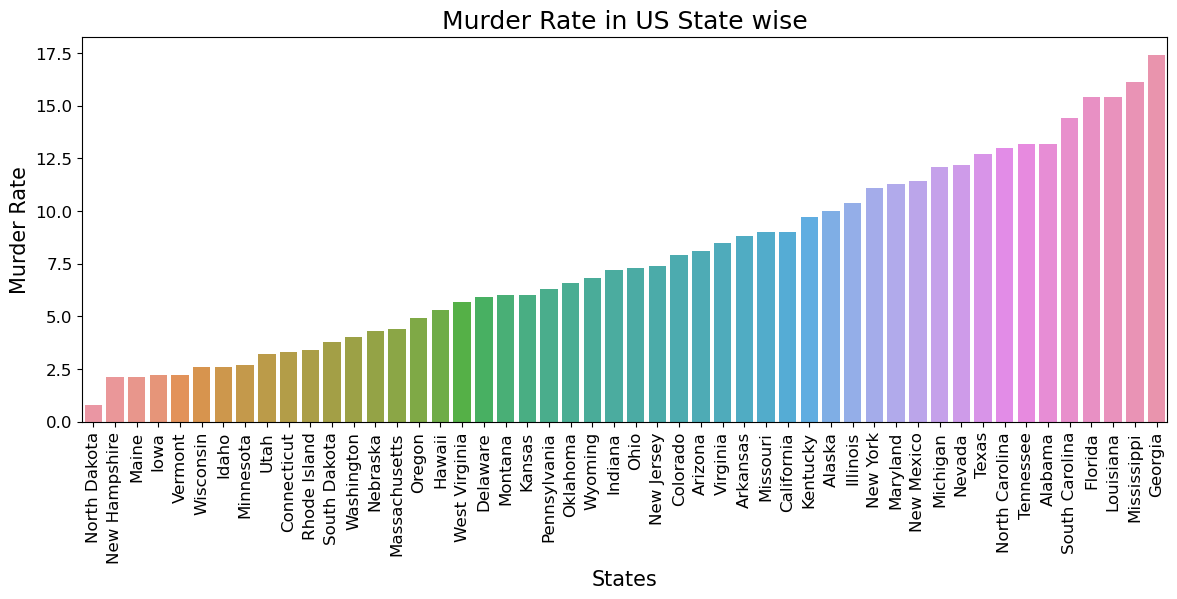

In [14]:
plt.figure(figsize=(14,5))
# make barplot and sort bars
sns.barplot(x='States',y="Murder",data=Crime_data,order=Crime_data.sort_values('Murder').States)

# set labels
plt.xlabel("States",size=15)
plt.ylabel("Murder Rate",size=15)
plt.yticks(rotation=0,fontsize=12)
plt.xticks(rotation=90,fontsize=12)
plt.title("Murder Rate in US State wise",size=18)
plt.show()

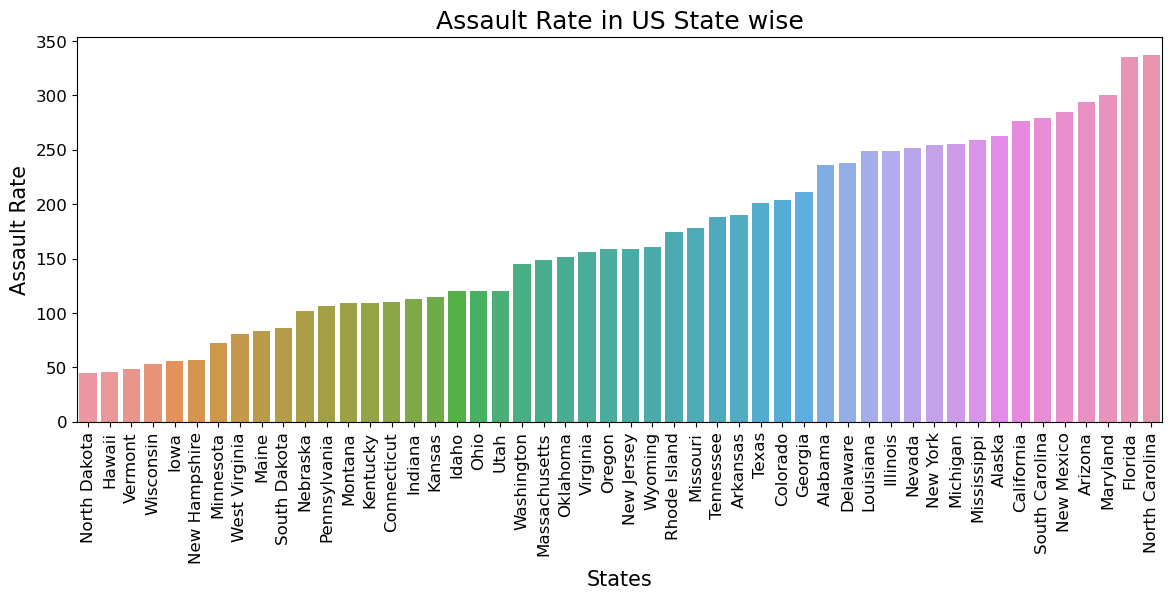

In [15]:
plt.figure(figsize=(14,5))
# make barplot and sort bars
sns.barplot(x='States',y="Assault",data=Crime_data,order=Crime_data.sort_values('Assault').States)

# set labels
plt.xlabel("States",size=15)
plt.ylabel("Assault Rate",size=15)
plt.yticks(rotation=0,fontsize=12)
plt.xticks(rotation=90,fontsize=12)
plt.title("Assault Rate in US State wise",size=18)
plt.show()

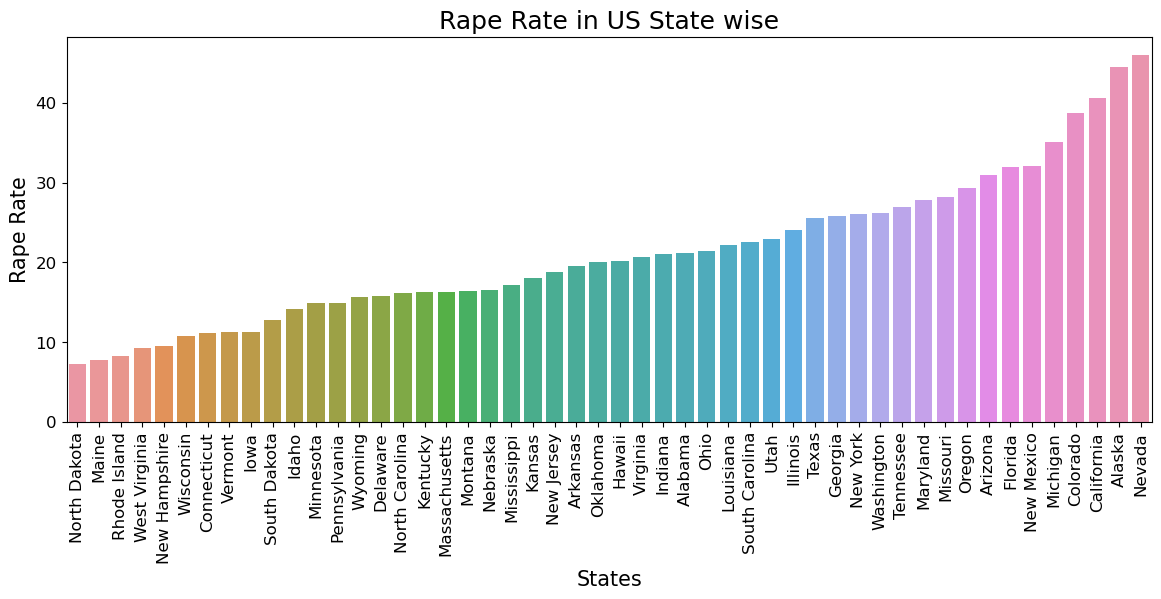

In [16]:
plt.figure(figsize=(14,5))
# make barplot and sort bars
sns.barplot(x='States',y="Rape",data=Crime_data,order=Crime_data.sort_values('Rape').States)

# set labels
plt.xlabel("States",size=15)
plt.ylabel("Rape Rate",size=15)
plt.yticks(rotation=0,fontsize=12)
plt.xticks(rotation=90,fontsize=12)
plt.title("Rape Rate in US State wise",size=18)
plt.show()

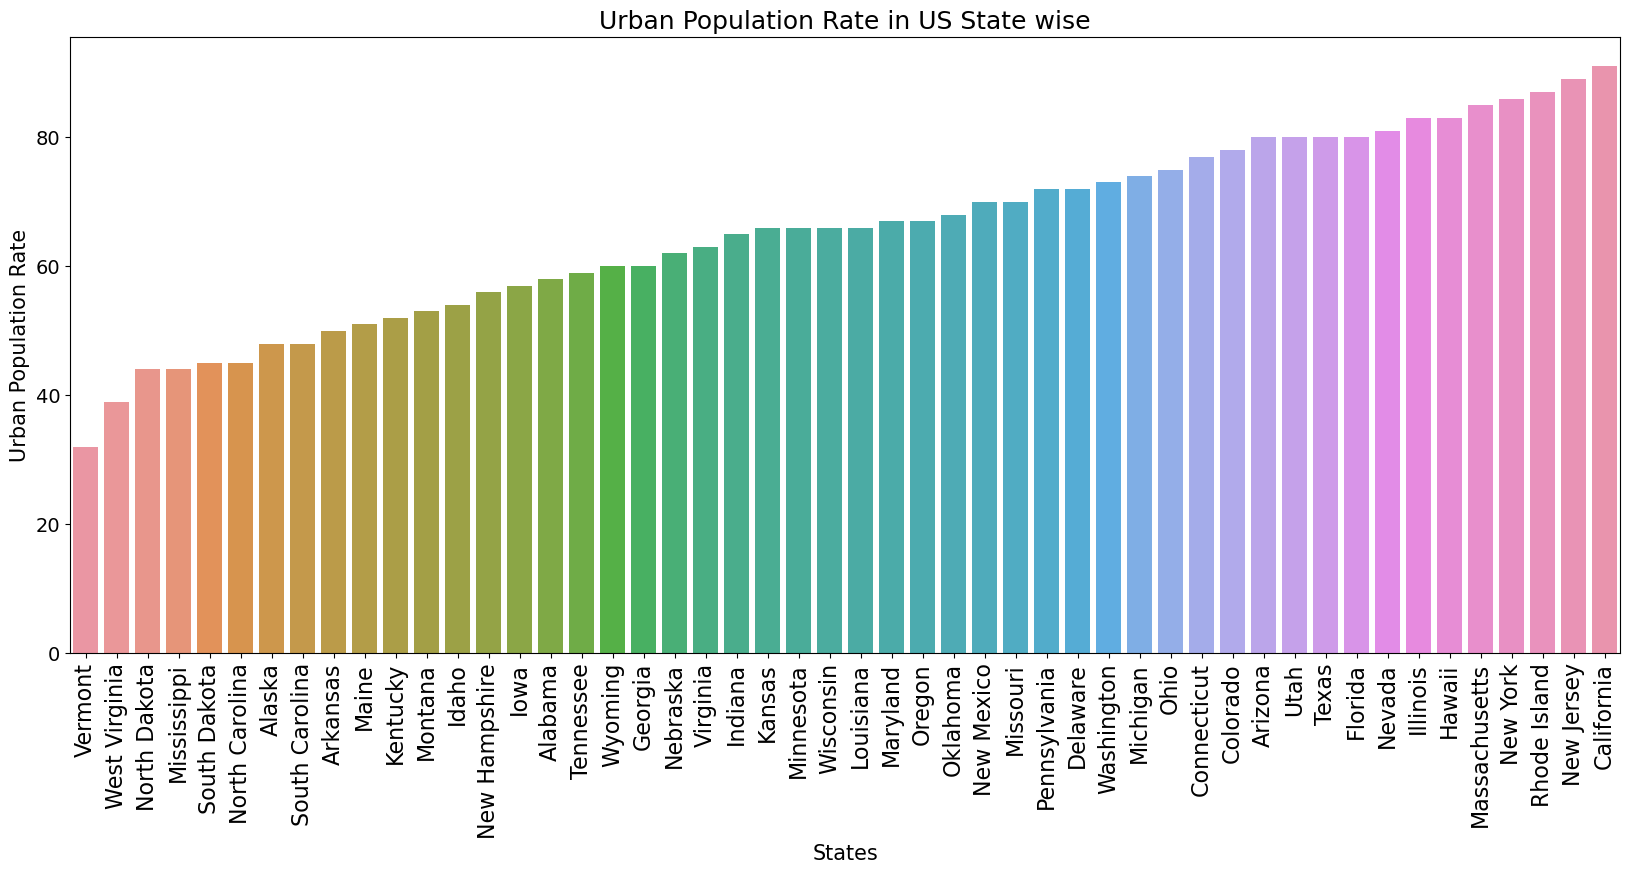

In [17]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x='States',
            y="UrbanPop", 
            data=Crime_data, 
            order=Crime_data.sort_values('UrbanPop').States)
# set labels
plt.xlabel("States",size=15)
plt.ylabel("Urban Population Rate",size=15)
plt.yticks(rotation=0,fontsize=14)
plt.xticks(rotation=90,fontsize=16)
plt.title("Urban Population Rate in US State wise",size=18)
plt.show()

A less number of crime rate can be seen North Dakota as it Urban population is less compare to Florida and has the opposite effect.

In [18]:
#sorting values according to highest population
Urban_population=Crime_data.sort_values('UrbanPop',ascending=False)
Urban_population.head(10)

,States,Murder,Assault,UrbanPop,Rape
4,California,9.0,276,91,40.6
29,New Jersey,7.4,159,89,18.8
38,Rhode Island,3.4,174,87,8.3
31,New York,11.1,254,86,26.1
20,Massachusetts,4.4,149,85,16.3
10,Hawaii,5.3,46,83,20.2
12,Illinois,10.4,249,83,24.0
27,Nevada,12.2,252,81,46.0
42,Texas,12.7,201,80,25.5
2,Arizona,8.1,294,80,31.0


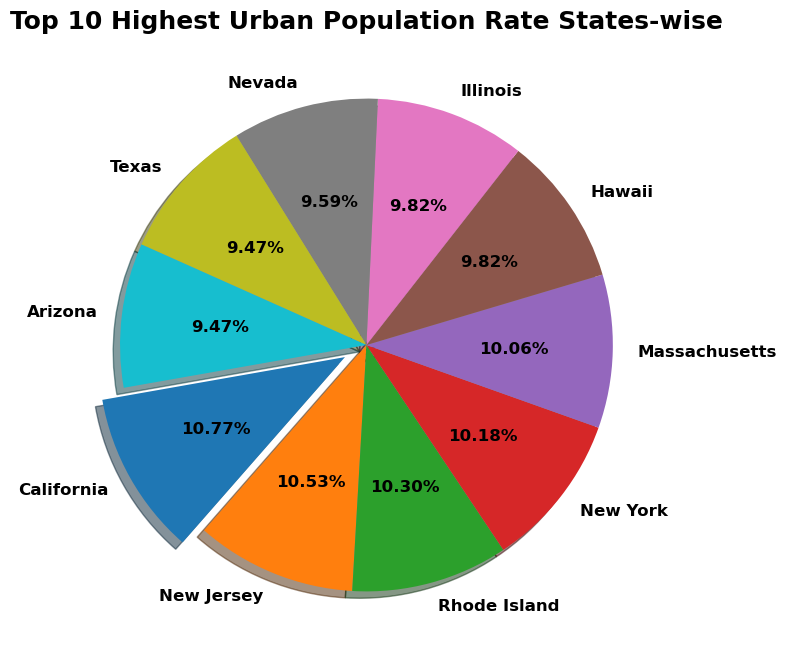

In [19]:
#plotting pie chart of 10 highest population rate states 
plt.figure(figsize=(8,8))
plt.pie(Urban_population.UrbanPop[:10],
       labels=Urban_population.States[:10],
       explode=[0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct='%.2f%%',
       shadow=True,
       startangle=190,
       textprops={'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.title("Top 10 Highest Urban Population Rate States-wise", fontsize = 18, fontweight = 'bold')
plt.show()

+ States with highest population rate are: California, New Jersey and Rhode Island
+ States with lowest population rate are: Vermount, West Virginia and North Dakota.

In [20]:
#sorting according to highest murder rate
Murder_Rate=Crime_data.sort_values('Murder',ascending=False,ignore_index=True)
Murder_Rate.head()

,States,Murder,Assault,UrbanPop,Rape
0,Georgia,17.4,211,60,25.8
1,Mississippi,16.1,259,44,17.1
2,Florida,15.4,335,80,31.9
3,Louisiana,15.4,249,66,22.2
4,South Carolina,14.4,279,48,22.5


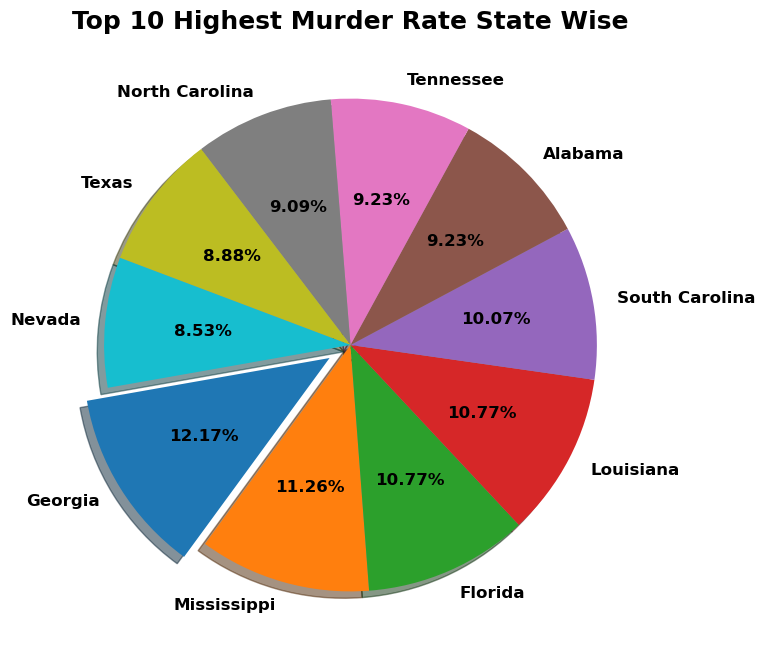

In [21]:
#pie chart
plt.figure(figsize=(8,8))
plt.pie(Murder_Rate.Murder[:10],
       labels=Murder_Rate.States[:10],
       explode=[0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct='%.2f%%',
       shadow=True,
       startangle=190,
       textprops={'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.title("Top 10 Highest Murder Rate State Wise",fontsize=18,fontweight='bold')
plt.show()

+ States with highest murder rate are: Georgia, Missisippi and Florida
+ States with lowest murder rate are: North Dakota, New Hampshire, Idaho, Iowa, Maine, Vermont and Wisconsin.

In [22]:
Assault_Rate=Crime_data.sort_values('Assault',ascending=False)
Assault_Rate.head()

,States,Murder,Assault,UrbanPop,Rape
32,North Carolina,13.0,337,45,16.1
8,Florida,15.4,335,80,31.9
19,Maryland,11.3,300,67,27.8
2,Arizona,8.1,294,80,31.0
30,New Mexico,11.4,285,70,32.1


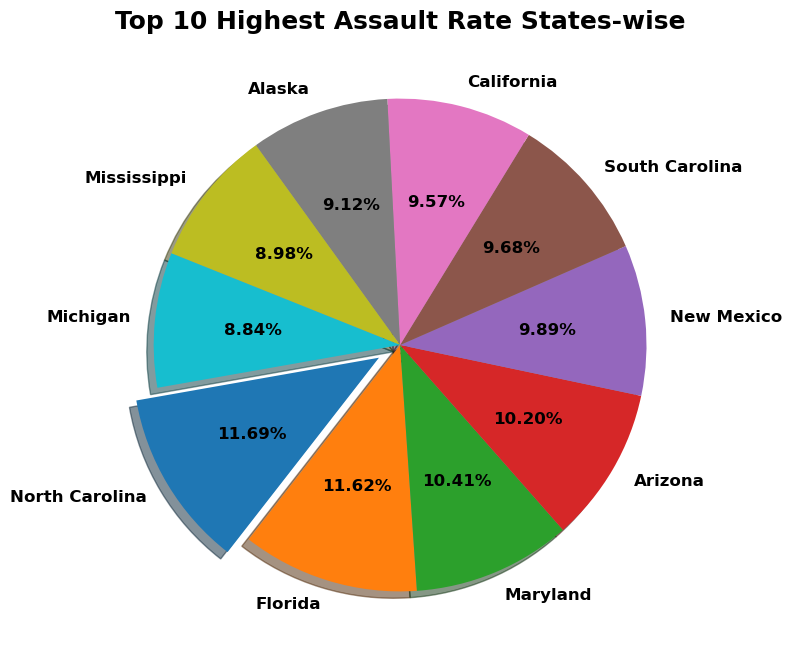

In [23]:
plt.figure(figsize=(8,8))
plt.pie(Assault_Rate.Assault[:10],
       labels=Assault_Rate.States[:10],
       explode=[0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct='%.2f%%',
       shadow=True,
       startangle=190,
       textprops={'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.title("Top 10 Highest Assault Rate States-wise",fontsize=18,fontweight='bold')
plt.show()

+ States with highest assault rate are: North Carolina, Florida and Maryland
+ States with lowest assault rate are: North Dakota, Hawaii and Vermont.

In [24]:
Rape_Rate=Crime_data.sort_values('Rape',ascending=False)
Rape_Rate.head()

,States,Murder,Assault,UrbanPop,Rape
27,Nevada,12.2,252,81,46.0
1,Alaska,10.0,263,48,44.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
21,Michigan,12.1,255,74,35.1


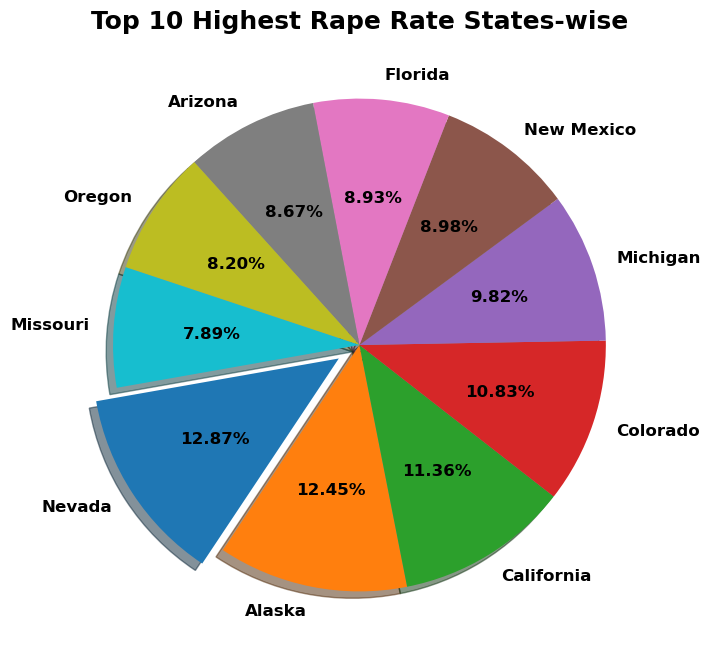

In [25]:
plt.figure(figsize=(8,8))
plt.pie(Rape_Rate.Rape[:10],
       labels=Rape_Rate.States[:10],
       explode=[0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct='%.2f%%',
       shadow=True,
       startangle=190,
       textprops={'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.title("Top 10 Highest Rape Rate States-wise",fontsize=18,fontweight='bold')
plt.show()

+ States with highest rape rate are: Nevada, Alaska and California
+ States with lowest rape rate are: North Dakota, Maine and Rhode Island.

In [26]:
Data=Crime_data.set_index('States')
Data.head()

,Murder,Assault,UrbanPop,Rape
States,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [27]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import silhouette_score,completeness_score

In [28]:
#Standardization
scaler=StandardScaler()
scaled_data=scaler.fit_transform(Data)
scaled_data

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

###### 1) KMean Clustering

In [29]:
#Building a rough model by taking any k-value
model=KMeans(n_clusters=2,random_state=42)
model.fit(scaled_data)

KMeans(n_clusters=2, random_state=42)

In [30]:
model.labels_

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [31]:
model.inertia_

104.96163315756871

In [32]:
wcss=[]
for i in range(1,11):
    model=KMeans(n_clusters=i,random_state=42)
    model.fit(scaled_data)
    wcss.append(model.inertia_)

In [33]:
wcss

[200.0,
 104.96163315756871,
 80.08569526137275,
 57.55425863091104,
 50.33327385184907,
 44.259807638112314,
 40.912667222473445,
 35.695877063333725,
 32.57509993011513,
 29.25349891673461]

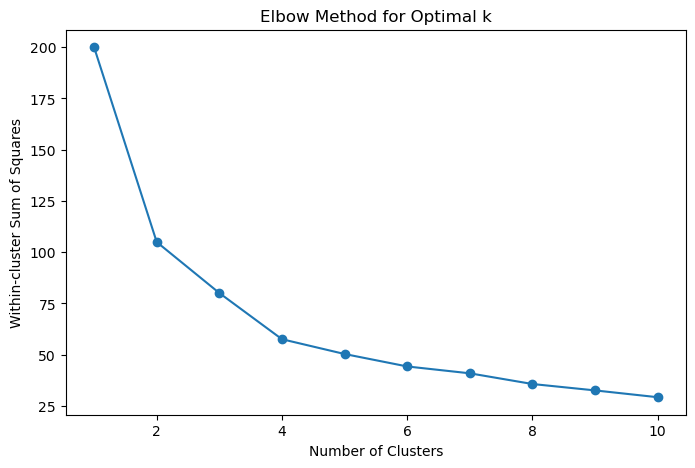

In [34]:
#plotting elbow plot
plt.figure(figsize=(8,5))
plt.plot(range(1,11),wcss,marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-cluster Sum of Squares')
plt.title('Elbow Method for Optimal k')
plt.show()

In [35]:
#Building the model with n_cluster=2
model_1=KMeans(n_clusters=2,random_state=42)
model_1.fit(scaled_data)
labels=model_1.labels_

In [36]:
labels

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [37]:
model_1.cluster_centers_

array([[-0.67675778, -0.68274685, -0.13306084, -0.57037591],
       [ 1.01513667,  1.02412028,  0.19959126,  0.85556386]])

In [38]:
df1=Data.copy()

In [39]:
df1['Labels']=labels
df1.head(2)

,Murder,Assault,UrbanPop,Rape,Labels
States,,,,,
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1


In [40]:
Crime_data['Labels']=labels

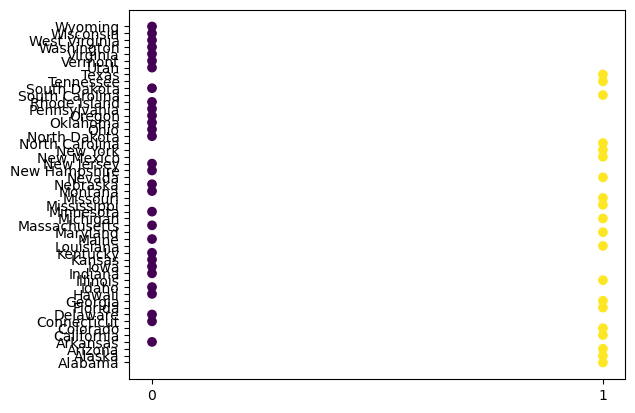

In [41]:
plt.scatter(df1['Labels'],df1.index,c=labels,cmap='viridis')
plt.xticks([0,1])
plt.show()

In [42]:
grp=df1.groupby(['Labels'])
grp

In [43]:
for x,y in grp:
    print(y)
    print('_________________________________________________________________________')

               Murder  Assault  UrbanPop  Rape  Labels
States                                                
Arkansas          8.8      190        50  19.5       0
Connecticut       3.3      110        77  11.1       0
Delaware          5.9      238        72  15.8       0
Hawaii            5.3       46        83  20.2       0
Idaho             2.6      120        54  14.2       0
Indiana           7.2      113        65  21.0       0
Iowa              2.2       56        57  11.3       0
Kansas            6.0      115        66  18.0       0
Kentucky          9.7      109        52  16.3       0
Maine             2.1       83        51   7.8       0
Massachusetts     4.4      149        85  16.3       0
Minnesota         2.7       72        66  14.9       0
Montana           6.0      109        53  16.4       0
Nebraska          4.3      102        62  16.5       0
New Hampshire     2.1       57        56   9.5       0
New Jersey        7.4      159        89  18.8       0
North Dako

In [44]:
grp.agg(['mean','min','max'])

Murder                Assault             UrbanPop               Rape  \
          mean  min   max        mean  min  max       mean min max       mean   
Labels                                                                          
0        4.870  0.8   9.7  114.433333   45  238  63.633333  32  89  15.943333   
1       12.165  7.9  17.4  255.250000  178  337  68.400000  44  91  29.165000   

                    
         min   max  
Labels              
0        7.3  29.3  
1       16.1  46.0

In [45]:
#Evaluate the model
silhouette_score(df1.iloc[:,0:11],labels)

0.5406967669844414

In [46]:
#Building the model with n_cluster=3
model_2=KMeans(n_clusters=3,random_state=42)
model_2.fit(scaled_data)
labels=model_2.labels_

In [47]:
df2=Data.copy()

In [48]:
df2['Labels']=labels
df2.head(2)

,Murder,Assault,UrbanPop,Rape,Labels
States,,,,,
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1


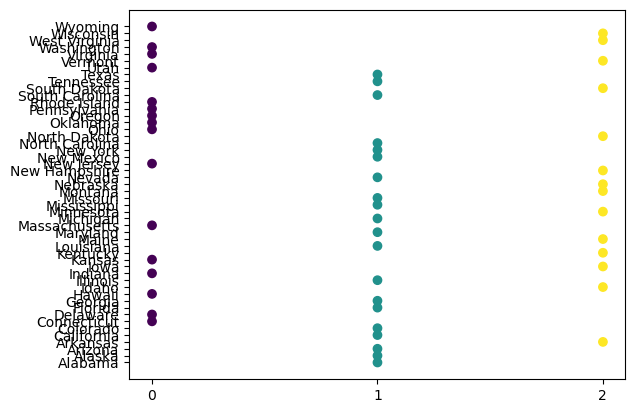

In [49]:
plt.scatter(df2['Labels'],df2.index,c=labels,cmap='viridis')
plt.xticks([0,1,2])
plt.show()

In [50]:
grp=df2.groupby(['Labels'])
grp

In [51]:
for x,y in grp:
    print(y)
    print('_________________________________________________________________________')

               Murder  Assault  UrbanPop  Rape  Labels
States                                                
Connecticut       3.3      110        77  11.1       0
Delaware          5.9      238        72  15.8       0
Hawaii            5.3       46        83  20.2       0
Indiana           7.2      113        65  21.0       0
Kansas            6.0      115        66  18.0       0
Massachusetts     4.4      149        85  16.3       0
New Jersey        7.4      159        89  18.8       0
Ohio              7.3      120        75  21.4       0
Oklahoma          6.6      151        68  20.0       0
Oregon            4.9      159        67  29.3       0
Pennsylvania      6.3      106        72  14.9       0
Rhode Island      3.4      174        87   8.3       0
Utah              3.2      120        80  22.9       0
Virginia          8.5      156        63  20.7       0
Washington        4.0      145        73  26.2       0
Wyoming           6.8      161        60  15.6       0
__________

In [52]:
grp.agg(['mean','min','max'])

Murder             Assault             UrbanPop              Rape  \
             mean  min   max     mean  min  max       mean min max      mean   
Labels                                                                         
0        5.656250  3.2   8.5  138.875   46  238  73.875000  60  89  18.78125   
1       12.165000  7.9  17.4  255.250  178  337  68.400000  44  91  29.16500   
2        3.971429  0.8   9.7   86.500   45  190  51.928571  32  66  12.70000   

                    
         min   max  
Labels              
0        8.3  29.3  
1       16.1  46.0  
2        7.3  19.5

In [53]:
#Evaluate the model
silhouette_score(df2.iloc[:,0:11],labels)

0.3423438441839449

###### Inference
By evaluating the model using silhouette score,we find out that,the ideal number of cluster is 2,with a score of 0.54,which is somewhat close to 1.

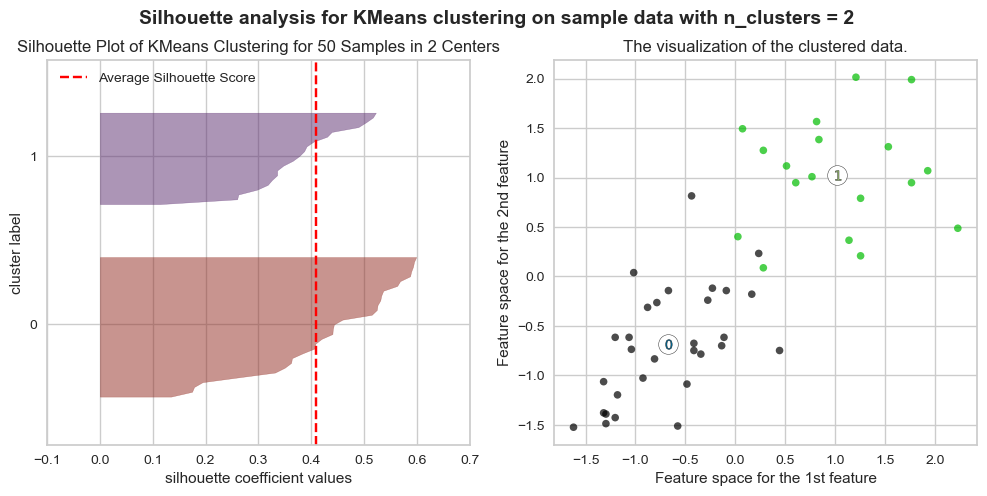

In [54]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2)=plt.subplots(1,2,sharey=False)
fig.set_size_inches(12,5)
sil_visualizer1=SilhouetteVisualizer(model_1,ax= ax1,colors=['#922B21','#5B2C6F','#1B4F72','#32a84a'])
sil_visualizer1.fit(scaled_data)

# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1=cm.nipy_spectral(model_1.labels_.astype(float)/2) # 2 is number of clusters
ax2.scatter(scaled_data[:, 0],scaled_data[:, 1],marker='o',s=30,lw=0,alpha=0.7,c=colors1,edgecolor='k')

# Labeling the clusters
centers1=model_1.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 0],centers1[:, 1],marker='o',c="white",alpha=1,s=200,edgecolor='k')

for i,c in enumerate(centers1):
    ax2.scatter(c[0],c[1],marker='$%d$' % i,alpha=1,s=50,edgecolor='k')

ax2.set_title(label="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % 2),fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()

We can now clearly see the 2 number of clusters formed, which can be described as:
+ Cluster 0:Safe Zone Defines the group of Urban States with Lowest of Crimes
+ Cluster 1:Danger Zone Defines the group of Urban States with Highest Rate of Crimes

###### 2) Hierarchical Clustering

In [55]:
#Normalization
scaler=MinMaxScaler()
minmax_data=scaler.fit_transform(Data)
minmax_data

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

In [56]:
import scipy.cluster.hierarchy as sch

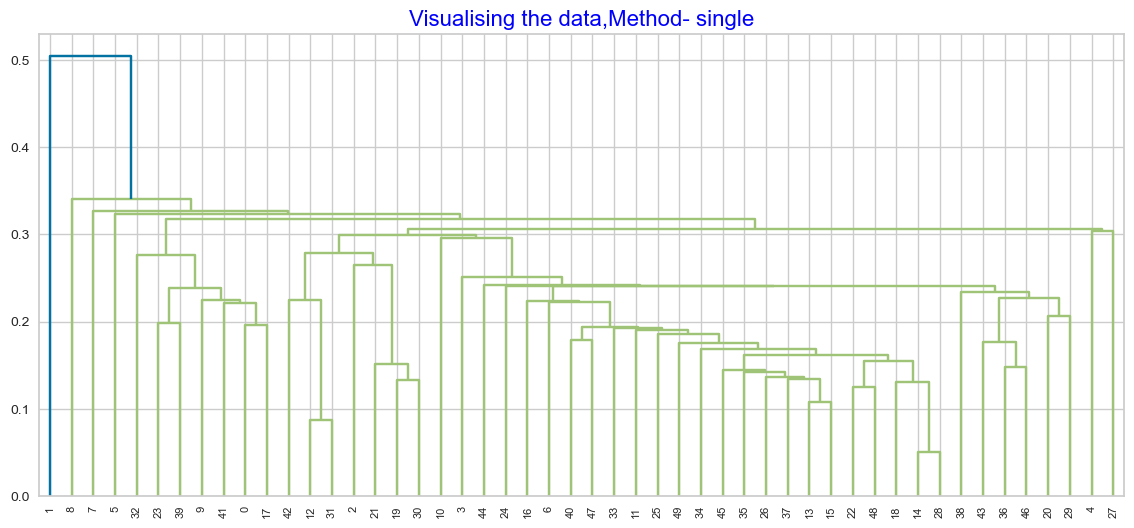

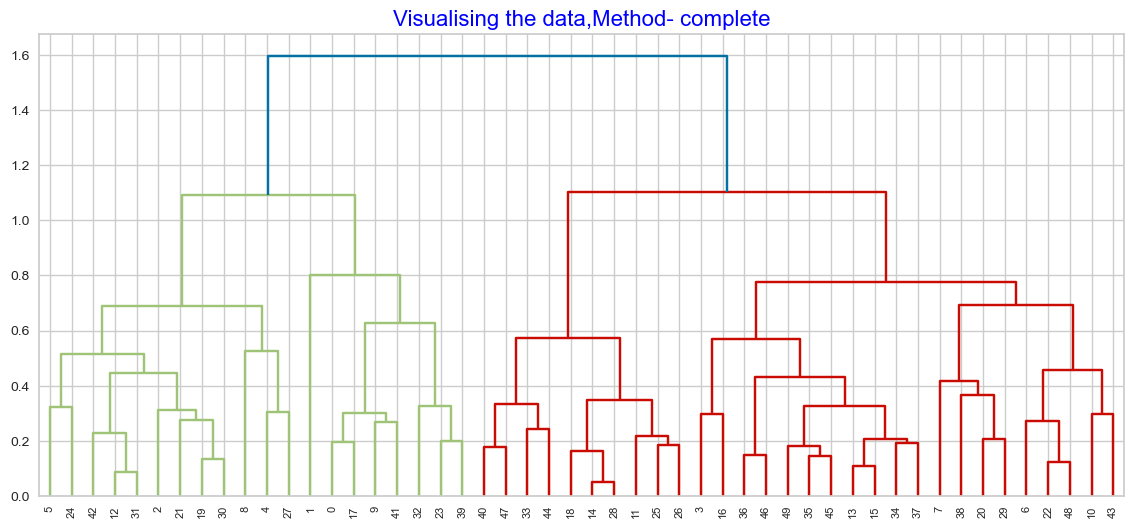

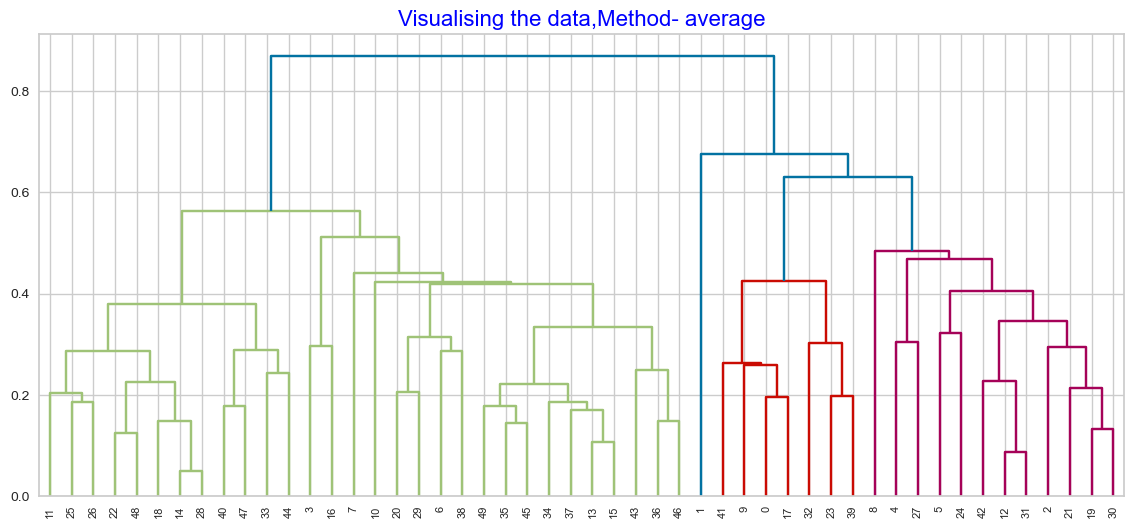

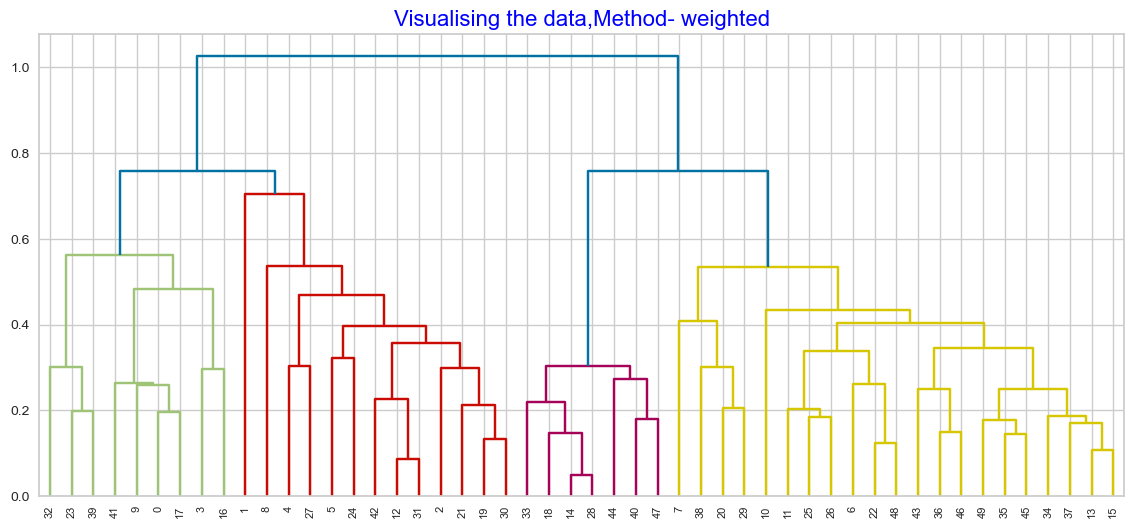

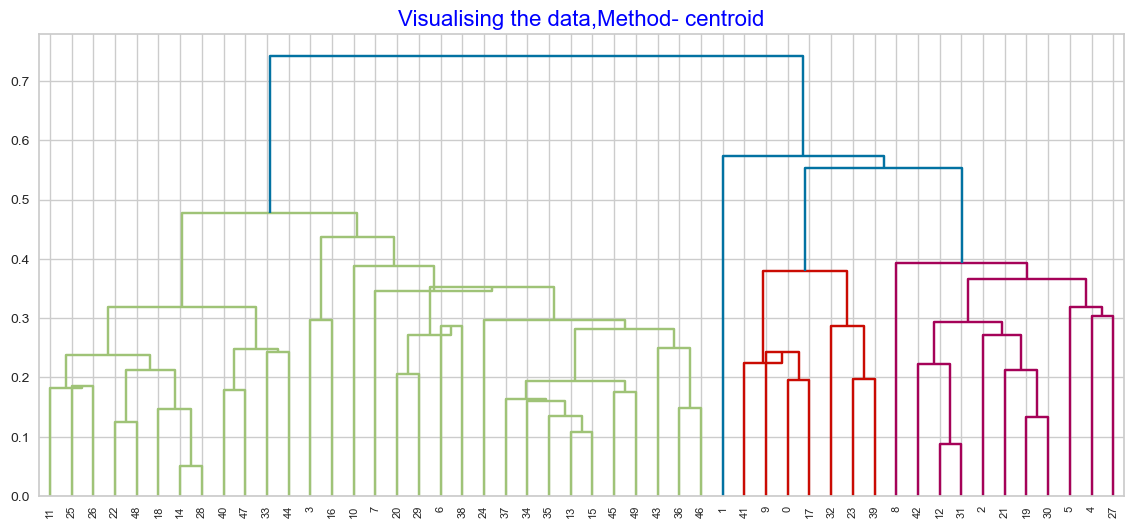

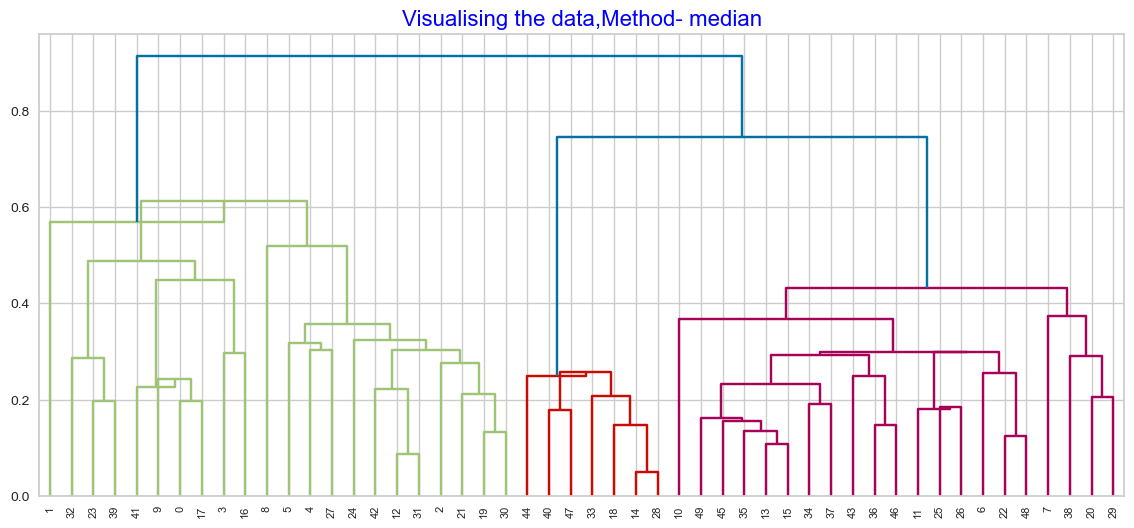

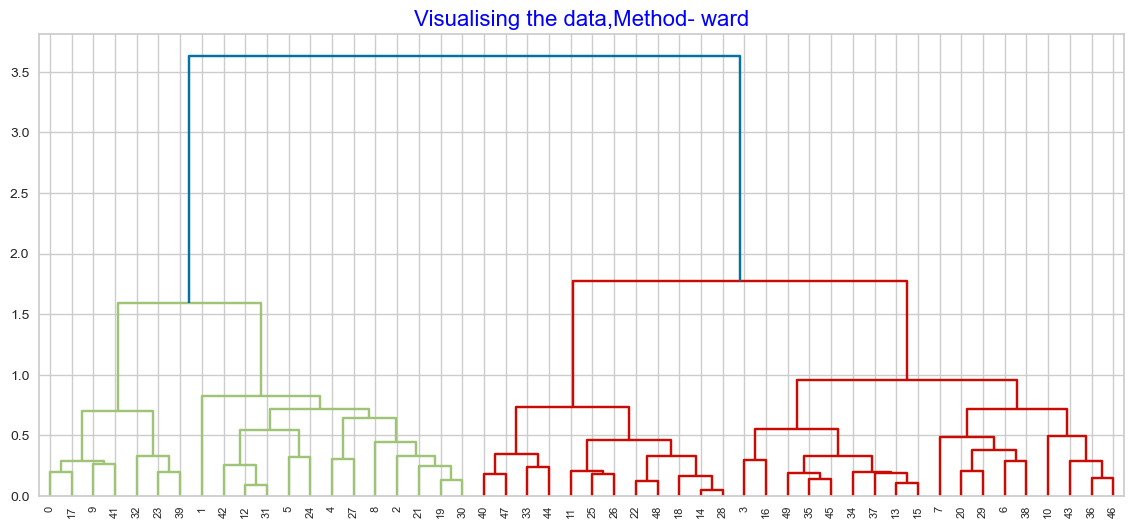

In [57]:
for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize=(14,6))    
    dict={'fontsize':16,'fontweight' :14, 'color' : 'blue'}    
    plt.title('Visualising the data,Method- {}'.format(methods),fontdict=dict) 
    Dendrogram1=sch.dendrogram(sch.linkage(minmax_data,method=methods,optimal_ordering=False))

In [58]:
from sklearn.cluster import AgglomerativeClustering

In [59]:
n_clusters=[2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1=AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1=hie_cluster1.fit_predict(minmax_data)
        silhouette_score1=silhouette_score(minmax_data,hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.42364457559625074
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.42364457559625074
For n_clusters = 2 The average silhouette_score with linkage- average : 0.42364457559625074
For n_clusters = 2 The average silhouette_score with linkage- single : 0.21033337025958487

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.31916915428121284
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.30877213909512063
For n_clusters = 3 The average silhouette_score with linkage- average : 0.35149572430421583
For n_clusters = 3 The average silhouette_score with linkage- single : 0.14223288708185444

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.3298707379986785
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.3060729442426308
For n_clusters = 4 The average silhouette_score with linkage- average : 0.36992391140277

The seperation in each Method indicate that 2 is the optimal number for clusters.

In [60]:
model=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
model.fit(minmax_data)

AgglomerativeClustering()

In [61]:
labels=model.labels_
labels

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [62]:
Data['Hierarchical Labels']=labels
Data.head()

,Murder,Assault,UrbanPop,Rape,Hierarchical Labels
States,,,,,
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,1


In [63]:
grp=Data.groupby(Data['Hierarchical Labels'])
grp

In [64]:
for x,y in grp:
    print(y)
    print("_____________________________________________________________________")

               Murder  Assault  UrbanPop  Rape  Hierarchical Labels
States                                                             
Arkansas          8.8      190        50  19.5                    0
Connecticut       3.3      110        77  11.1                    0
Delaware          5.9      238        72  15.8                    0
Hawaii            5.3       46        83  20.2                    0
Idaho             2.6      120        54  14.2                    0
Indiana           7.2      113        65  21.0                    0
Iowa              2.2       56        57  11.3                    0
Kansas            6.0      115        66  18.0                    0
Kentucky          9.7      109        52  16.3                    0
Maine             2.1       83        51   7.8                    0
Massachusetts     4.4      149        85  16.3                    0
Minnesota         2.7       72        66  14.9                    0
Montana           6.0      109        53  16.4  

In [65]:
grp.agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
Hierarchical Labels,,,,
0,4.870,114.433333,63.633333,15.943333
1,12.165,255.250000,68.400000,29.165000


In [66]:
#evaluating the model
(silhouette_score(minmax_data,model.labels_)*100).round(3)

42.364

+ The states in the Cluster-0 seems to be Safe-Zone where there are relativley less Murders,Assaults and Rapes.
+ The states in Cluster-1 seems to have higher crime rates and can be regarded as Danger-Zone.

###### 3) DBSCAN - (Density Based Spatial Clustering of Applications with Noise)

In [67]:
from itertools import product

eps_values=np.arange(0.25,2,0.25) # eps values to be investigated
min_samples=np.arange(1,3)# min_samples values to be investigated
DBSCAN_params=list(product(eps_values,min_samples))

In [68]:
from sklearn.cluster import DBSCAN

In [69]:
from sklearn.metrics import silhouette_score as sil

In [70]:
#Standardization
scaler=StandardScaler()
std_data=scaler.fit_transform(Data)
std_data

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116,  1.22474487],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392,  1.22474487],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626,  1.22474487],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398, -0.81649658],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393,  1.22474487],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137,  1.22474487],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319, -0.81649658],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422, -0.81649658],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ,  1.22474487],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293,  1.22474487],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987, -0.81649658],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217, -0.81649658],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525,  1.22474487],
       [-0.13637203, -0.70012057, -0.0

In [71]:
no_of_clusters=[]
sil_score= []

for p in DBSCAN_params:
    DBS_clustering=DBSCAN(eps=p[0],min_samples=p[1]).fit(std_data)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(sil(std_data, DBS_clustering.labels_))

A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.


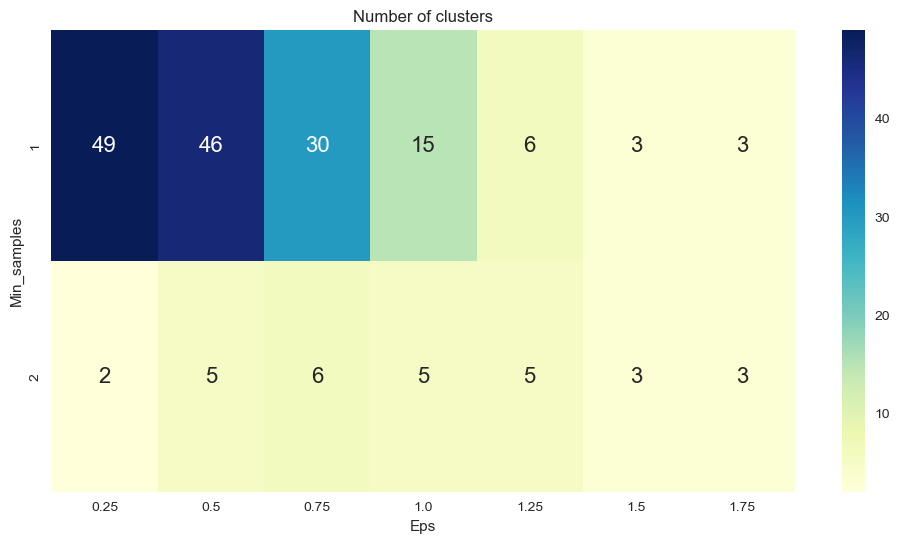

In [72]:
#Collecting number of generated clusters.
tmp=pd.DataFrame.from_records(DBSCAN_params,columns=['Eps','Min_samples'])   
tmp['No_of_clusters']=no_of_clusters

pivot_1=pd.pivot_table(tmp,values='No_of_clusters',index='Min_samples',columns='Eps')

fig,ax=plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1,annot=True,annot_kws={"size": 16},cmap="YlGnBu",ax=ax)
ax.set_title('Number of clusters')
print('A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

As the heatplot above shows, the number of clusters vary from 49 to 2.

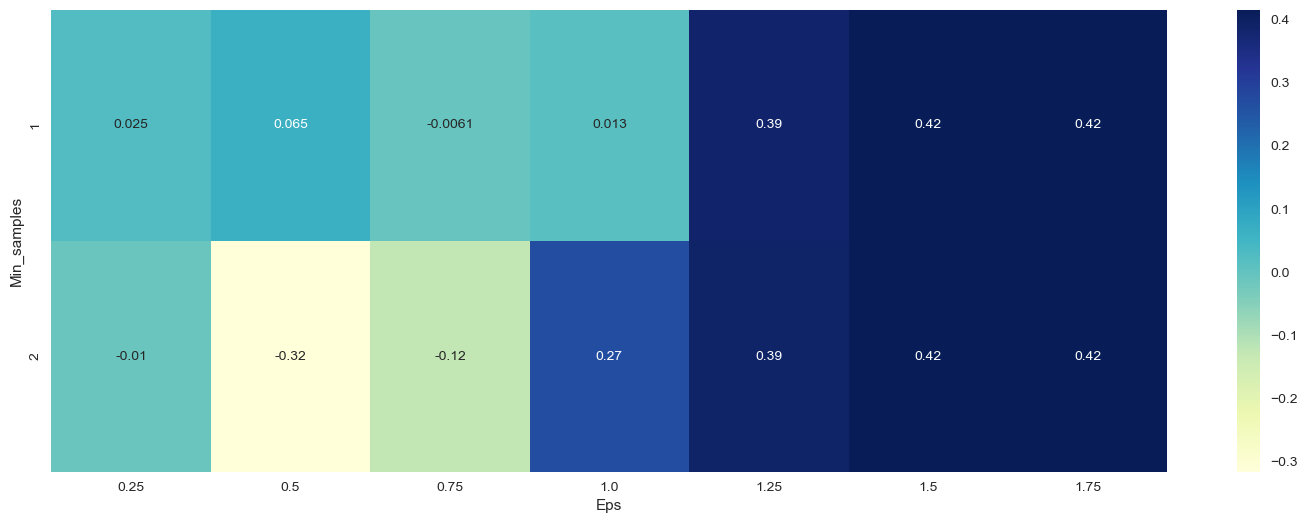

In [73]:
tmp=pd.DataFrame.from_records(DBSCAN_params,columns =['Eps','Min_samples'])   
tmp['Sil_score']=sil_score

pivot_1=pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

Global maximum is 0.23 for eps=1.25 and min_samples=2

In [74]:
epsilon = [0.25,0.50,0.75,1,1.25,1.50,1.75,2]
min_samples = [1,2]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(std_data)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = sil(std_data, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 1.5 
min_sample= 1 
number of clusters= 3 
average silhouette score= 0.4154


In [75]:
dbscan = DBSCAN(eps=1.5, min_samples=1) # min_samples = number of columns  or len(dataset.columns)* 3
dbscan.fit(std_data)

DBSCAN(eps=1.5, min_samples=1)

In [76]:
dbscan.labels_

array([0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0,
       2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2], dtype=int64)

In [77]:
Data['DBSCAN_labels'] = dbscan.labels_
Data.head()

,Murder,Assault,UrbanPop,Rape,Hierarchical Labels,DBSCAN_labels
States,,,,,,
Alabama,13.2,236,58,21.2,1,0
Alaska,10.0,263,48,44.5,1,1
Arizona,8.1,294,80,31.0,1,0
Arkansas,8.8,190,50,19.5,0,2
California,9.0,276,91,40.6,1,0


In [78]:
Data.groupby('DBSCAN_labels').agg(['mean'])

,Murder,Assault,UrbanPop,Rape,Hierarchical Labels
,mean,mean,mean,mean,mean
DBSCAN_labels,,,,,
0,12.278947,254.842105,69.473684,28.357895,1.0
1,10.000000,263.000000,48.000000,44.500000,1.0
2,4.870000,114.433333,63.633333,15.943333,0.0


In [79]:
print("Silhouette Coefficient: %0.3f" % sil(std_data, dbscan.labels_))

Silhouette Coefficient: 0.415


The states in the Cluster-0 seems to be Safe-Zone where there are relativley less Murders,Assaults and Rapes.
The states in Cluster-1 seems to have higher crime rates and can be regarded as Danger-Zone.